<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:
1. Algoritma k-Nearest Neighbors (k-NN) adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors). Dengan k merupakan banyaknya tetangga terdekat. Langkah-langkah untuk menghitung metode k-Nearest Neighbor antara lain: Menentukan parameter k; Menghitung jarak antara data yang akan dievaluasi dengan semua pelatihan; Mengurutkan jarak yang terbentuk; Menentukan jarak terdekat sampai urutan k; Memasangkan kelas yang bersesuaian; Mencari jumlah kelas dari tetangga yang terdekat dan tetapkan kelas tersebut sebagai kelas data yang akan dievaluasi
2. Perlu menunjukkan parameter K (jumlah tetangga terdekat), Tidak menangani nilai hilang (missing value) secara implisit, Sensitif terhadap data pencilan (outlier), Rentan terhadap variabel yang non-informatif, Rentan terhadap dimensionalitas yang tinggi, dan Biaya komputasi cukup tinggi karena diperlukan perhitungan jarak dari setiap sampel uji pada keseluruhan sampel latih.

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [7]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

In [11]:
ks = np.arange(2,21)
weights = ['distance','uniform']

In [12]:
list(product(ks,weights))

[(2, 'distance'),
 (2, 'uniform'),
 (3, 'distance'),
 (3, 'uniform'),
 (4, 'distance'),
 (4, 'uniform'),
 (5, 'distance'),
 (5, 'uniform'),
 (6, 'distance'),
 (6, 'uniform'),
 (7, 'distance'),
 (7, 'uniform'),
 (8, 'distance'),
 (8, 'uniform'),
 (9, 'distance'),
 (9, 'uniform'),
 (10, 'distance'),
 (10, 'uniform'),
 (11, 'distance'),
 (11, 'uniform'),
 (12, 'distance'),
 (12, 'uniform'),
 (13, 'distance'),
 (13, 'uniform'),
 (14, 'distance'),
 (14, 'uniform'),
 (15, 'distance'),
 (15, 'uniform'),
 (16, 'distance'),
 (16, 'uniform'),
 (17, 'distance'),
 (17, 'uniform'),
 (18, 'distance'),
 (18, 'uniform'),
 (19, 'distance'),
 (19, 'uniform'),
 (20, 'distance'),
 (20, 'uniform')]

In [14]:
def knn_predict (k,weight):
    model = KNeighborsClassifier(n_neighbors=k, weights=weight)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    return score

In [15]:
list_uniform_score = []
list_distance_score = []


for k,weight in product(ks,weights):
    score = knn_predict(k=k,weight=weight)
    if weight == 'uniform':
        list_uniform_score.append(score)
    elif weight == 'distance':
        list_distance_score.append(score)

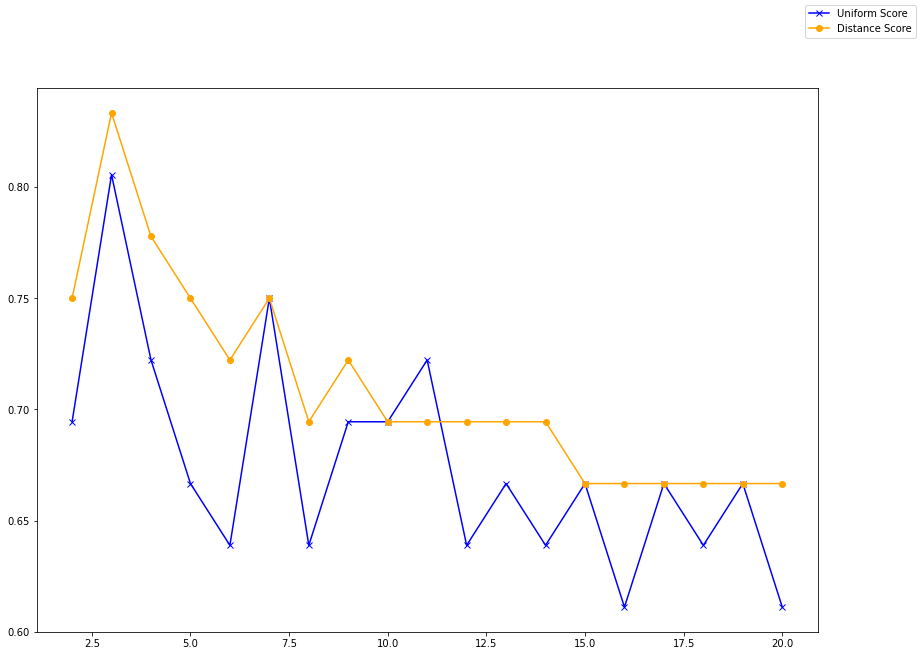

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(ks, list_uniform_score, color='b', label='Uniform Score', marker='x')
ax.plot(ks, list_distance_score, color='orange', label='Distance Score', marker='o')
fig.legend()
plt.show()

In [30]:
print("Uniform Scores:\n",list_uniform_score)
print("\nDistance Score:\n",list_distance_score)

Uniform Scores:
 [0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112]

Distance Score:
 [0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [33]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [34]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X,y)

LinearRegression()

In [35]:
model_lr.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [36]:
model_lr.intercept_

0.5000000016247697

In [41]:
y = 1.5*X - 5*X + 9*X + 10*X +5

In [42]:
y

array([[ 69.63841073, 116.65029648,   5.0177281 ,  51.86154876],
       [ 27.74716308,  19.31248219,  33.87033276,  58.56191269],
       [ 66.49895851,  88.51659377,  69.97514973, 111.20902256],
       [ 36.69009871, 141.10820264,   9.24507695, 108.92246408],
       [ 69.68224437,  91.59692341,  26.75997548,  35.70573081],
       [129.11540814, 155.08054424,  53.58074761, 112.31000543],
       [140.84031861, 143.66403284,  18.18185276,  11.0534914 ],
       [ 31.32371503, 141.11208803,  20.24375924,  70.27168188],
       [153.47287717,  87.64061917, 112.24095266,  53.90492281],
       [111.40764379, 134.36697914,   7.83468299, 121.27236882],
       [158.27346878, 120.96567643,  48.46881877, 127.33829591],
       [ 21.00003102,  74.42349656, 145.83230298,  50.510193  ],
       [ 49.60517748,  25.15442868,   8.00187847, 110.21950761],
       [ 37.80235798,  46.1597322 ,  81.19383969,  13.27119449],
       [ 93.98822885,  27.74292911,  96.34235822, 113.4625458 ],
       [ 20.86183647,  69